In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.616087704196445 55.98907970723755
15.776812558953722 -89.16654060787155
-6.526714453912305 -23.92204174637331
54.817718600029366 -104.00017109631479
56.60269941157762 100.19690473916438
9.359477147915115 130.84628297880624
-45.64473266450099 132.5503668653683
-10.346602353547993 39.89007411946639
30.007884198039022 -141.8324058967877
70.49419149092512 -4.340686487880674
-11.311227489483372 -14.692517791975433
-46.84587102621559 -17.013924702439482
-73.4438042408947 -134.1282651613645
50.41810329496781 -57.08468768822391
39.70049847304293 16.93067179408908
-24.46059665944118 22.05684716427743
-64.45038416803703 -121.37843688956474
49.17610216227243 43.11531082766152
-42.98756189292535 -116.41861794429818
-52.517749483302026 142.57834863155256
67.27773817983842 -63.37201258930661
-58.88752455506971 -43.36577847737425
-40.423491012686824 -165.99903644589202
-9.156206431031038 154.14769386924013
43.07165274137685 102.7995259992748
-28.42614913788062 -46.03868403441368
-1.23639765425670

38.07648164863437 -170.0889265509881
59.389540068946474 115.00840990813253
-22.704825573387595 103.73284639626524
86.37508341291527 -163.1961098508892
80.2553587181549 96.2567599849313
-24.894025688414146 -16.06413508183053
-85.09376158656019 -123.14342234958988
-36.86550396417831 -178.62416057771398
54.8632515554977 -49.05993903102794
-77.40424102620389 -93.13457085513079
-74.8474861601145 -138.1646663691295
-1.4120677569022888 73.10352015155405
-89.44604595009037 110.72579631569135
27.490319685300832 67.27266483876323
11.981325817994218 83.50868008380337
-6.770484233766439 167.89427468644152
43.52549916427719 -121.17703764477216
-81.19695926759957 -28.96946083691057
4.3146907348209425 108.18214957591437
-3.060358991969153 -85.67738689642711
-42.08247739340875 140.3823864563663
51.780273249427296 -164.94397380511953
-23.836584991686607 112.22034482360556
4.670896126336871 -164.34577676202306
-35.77450169664716 -146.614329553135
80.19523075219809 -55.31366175419318
-2.468746767375933 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
# Print city count to confirm sufficient count
len(cities)

636

In [7]:
# Import requests library
import requests

# Import api key
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold weather data.
city_data = []
#Print begining of logging
print('Beginning Data Retrieval       ')
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and city.
    print(f" Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(cities)

Beginning Data Retrieval       
-------------------------------
 Processing Record 1 of Set 1 | saint-joseph
 Processing Record 2 of Set 1 | el estor
 Processing Record 3 of Set 1 | georgetown
 Processing Record 4 of Set 1 | la ronge
 Processing Record 5 of Set 1 | chunskiy
 Processing Record 6 of Set 1 | kloulklubed
 Processing Record 7 of Set 1 | mount gambier
 Processing Record 8 of Set 1 | mtwara
 Processing Record 9 of Set 1 | hilo
 Processing Record 10 of Set 1 | klaksvik
 Processing Record 11 of Set 1 | jamestown
 Processing Record 12 of Set 1 | rikitea
 Processing Record 13 of Set 1 | deer lake
 Processing Record 14 of Set 1 | cariati
 Processing Record 15 of Set 1 | tshane
 Processing Record 16 of Set 1 | kletskaya
 Processing Record 17 of Set 1 | new norfolk
 Processing Record 18 of Set 1 | pangnirtung
 Processing Record 19 of Set 1 | mar del plata
 Processing Record 20 of Set 1 | avarua
 Processing Record 21 of Set 1 | buin
 Processing Record 22 of Set 1 | hovd
 Processing R

 Processing Record 34 of Set 4 | mexico
 Processing Record 35 of Set 4 | qaanaaq
 Processing Record 36 of Set 4 | praia
 Processing Record 37 of Set 4 | saint-pierre
 Processing Record 38 of Set 4 | dasoguz
 Processing Record 39 of Set 4 | leshukonskoye
 Processing Record 40 of Set 4 | segou
 Processing Record 41 of Set 4 | mahebourg
 Processing Record 42 of Set 4 | balaguer
 Processing Record 43 of Set 4 | olbia
 Processing Record 44 of Set 4 | kegayli
City not found. Skipping...
 Processing Record 45 of Set 4 | agadez
 Processing Record 46 of Set 4 | copiapo
 Processing Record 47 of Set 4 | smolenka
 Processing Record 48 of Set 4 | vuktyl
 Processing Record 49 of Set 4 | rio claro
 Processing Record 50 of Set 4 | taltal
 Processing Record 1 of Set 5 | necochea
 Processing Record 2 of Set 5 | sale
 Processing Record 3 of Set 5 | coahuayana
 Processing Record 4 of Set 5 | chuy
 Processing Record 5 of Set 5 | port lincoln
 Processing Record 6 of Set 5 | argayash
 Processing Record 7 of 

 Processing Record 23 of Set 8 | raudeberg
 Processing Record 24 of Set 8 | boca do acre
 Processing Record 25 of Set 8 | kyzyl
 Processing Record 26 of Set 8 | lephepe
City not found. Skipping...
 Processing Record 27 of Set 8 | alotau
City not found. Skipping...
 Processing Record 28 of Set 8 | pemba
 Processing Record 29 of Set 8 | bandarbeyla
 Processing Record 30 of Set 8 | ipatovo
 Processing Record 31 of Set 8 | diffa
 Processing Record 32 of Set 8 | pantai remis
 Processing Record 33 of Set 8 | temaraia
City not found. Skipping...
 Processing Record 34 of Set 8 | seoul
 Processing Record 35 of Set 8 | progreso
 Processing Record 36 of Set 8 | nam tha
City not found. Skipping...
 Processing Record 37 of Set 8 | elbistan
 Processing Record 38 of Set 8 | maniitsoq
 Processing Record 39 of Set 8 | isla vista
 Processing Record 40 of Set 8 | contamana
 Processing Record 41 of Set 8 | kununurra
 Processing Record 42 of Set 8 | alekseyevsk
 Processing Record 43 of Set 8 | susanino
 Pr

 Processing Record 6 of Set 12 | gombong
 Processing Record 7 of Set 12 | zhigansk
 Processing Record 8 of Set 12 | niamey
 Processing Record 9 of Set 12 | kropotkin
 Processing Record 10 of Set 12 | warah
 Processing Record 11 of Set 12 | mamallapuram
 Processing Record 12 of Set 12 | bend
 Processing Record 13 of Set 12 | victor harbor
 Processing Record 14 of Set 12 | avera
 Processing Record 15 of Set 12 | ugoofaaru
 Processing Record 16 of Set 12 | maarianhamina
 Processing Record 17 of Set 12 | alta floresta
 Processing Record 18 of Set 12 | road town
 Processing Record 19 of Set 12 | sijunjung
 Processing Record 20 of Set 12 | sibu
 Processing Record 21 of Set 12 | cayenne
 Processing Record 22 of Set 12 | jiroft
City not found. Skipping...
 Processing Record 23 of Set 12 | karamea
City not found. Skipping...
 Processing Record 24 of Set 12 | phetchaburi
 Processing Record 25 of Set 12 | chicama
 Processing Record 26 of Set 12 | yaan
 Processing Record 27 of Set 12 | vila velha


636

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [50]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,2022-07-14 15:35:16,-21.3667,55.6167,70.18,79,56,10.27
1,El Estor,GT,2022-07-14 15:40:11,15.5333,-89.3500,85.06,66,100,1.92
2,Georgetown,MY,2022-07-14 15:36:12,5.4112,100.3354,82.89,90,20,0.00
3,La Ronge,CA,2022-07-14 15:40:12,55.1001,-105.2842,68.25,40,20,10.36
4,Chunskiy,RU,2022-07-14 15:40:12,56.0815,99.6342,50.59,77,23,2.30
5,Kloulklubed,PW,2022-07-14 15:40:13,7.0419,134.2556,73.90,76,99,6.82
6,Mount Gambier,AU,2022-07-14 15:40:14,-37.8333,140.7667,46.31,100,100,8.05
7,Mtwara,TZ,2022-07-14 15:40:14,-10.2667,40.1833,75.76,68,69,15.21
8,Hilo,US,2022-07-14 15:36:36,19.7297,-155.0900,74.62,91,100,4.61
9,Klaksvik,FO,2022-07-14 15:40:15,62.2266,-6.5890,54.52,80,69,13.71


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

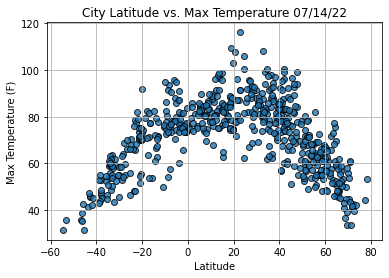

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

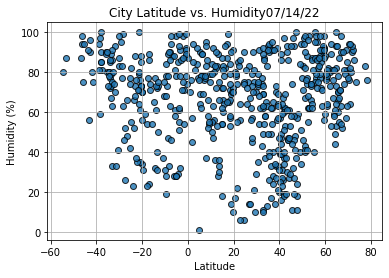

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

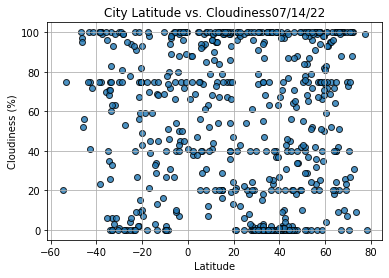

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

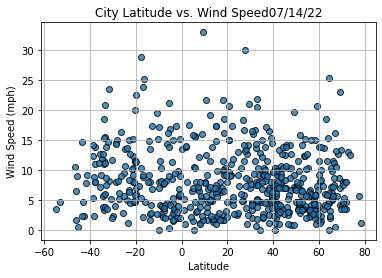

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [85]:
# Import linregress
from scipy.stats import linregress

# Create a funtion to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept. 
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.show()

In [86]:
index13 = city_data_df.loc[13]
index13

City                      Cariati
Country                        IT
Date          2022-07-14 15:40:17
Lat                       39.4922
Lng                       16.9594
Max Temp                    80.49
Humidity                       41
Cloudiness                      0
Wind Speed                   4.94
Name: 13, dtype: object

In [87]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3       True
4       True
       ...  
584     True
585     True
586     True
587     True
588     True
Name: Lat, Length: 589, dtype: bool

In [88]:
# Create Northern Hemisphere Data Frame 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,El Estor,GT,2022-07-14 15:40:11,15.5333,-89.3500,85.06,66,100,1.92
2,Georgetown,MY,2022-07-14 15:36:12,5.4112,100.3354,82.89,90,20,0.00
3,La Ronge,CA,2022-07-14 15:40:12,55.1001,-105.2842,68.25,40,20,10.36
4,Chunskiy,RU,2022-07-14 15:40:12,56.0815,99.6342,50.59,77,23,2.30
5,Kloulklubed,PW,2022-07-14 15:40:13,7.0419,134.2556,73.90,76,99,6.82


In [89]:
# Create Southern Hemisphere Data Frame 
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,2022-07-14 15:35:16,-21.3667,55.6167,70.18,79,56,10.27
6,Mount Gambier,AU,2022-07-14 15:40:14,-37.8333,140.7667,46.31,100,100,8.05
7,Mtwara,TZ,2022-07-14 15:40:14,-10.2667,40.1833,75.76,68,69,15.21
11,Rikitea,PF,2022-07-14 15:40:16,-23.1203,-134.9692,65.77,88,100,6.62
14,Tshane,BW,2022-07-14 15:40:18,-24.0196,21.8684,66.07,23,0,5.03


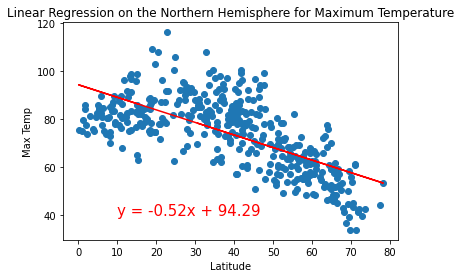

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

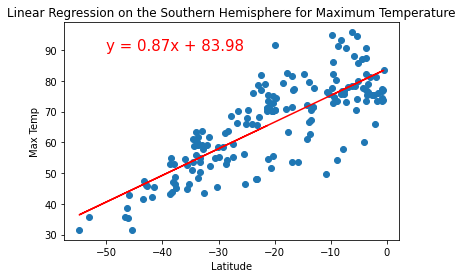

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [92]:
northern_hemi_df.corr()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
Lat,1.000000,0.019856,-0.681191,0.118666,-0.012665,-0.078495
Lng,0.019856,1.000000,-0.080487,0.211203,0.208109,-0.025938
Max Temp,-0.681191,-0.080487,1.000000,-0.569805,-0.276649,0.138919
Humidity,0.118666,0.211203,-0.569805,1.000000,0.484739,-0.233705
Cloudiness,-0.012665,0.208109,-0.276649,0.484739,1.000000,-0.215880
Wind Speed,-0.078495,-0.025938,0.138919,-0.233705,-0.215880,1.000000


In [82]:
southern_hemi_df.corr()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
Lat,1.000000,-0.069520,0.809502,-0.202814,0.009227,-0.065498
Lng,-0.069520,1.000000,-0.280558,0.331638,0.037238,-0.157077
Max Temp,0.809502,-0.280558,1.000000,-0.353253,0.013786,0.112595
Humidity,-0.202814,0.331638,-0.353253,1.000000,0.461741,-0.056366
Cloudiness,0.009227,0.037238,0.013786,0.461741,1.000000,0.016003
Wind Speed,-0.065498,-0.157077,0.112595,-0.056366,0.016003,1.000000


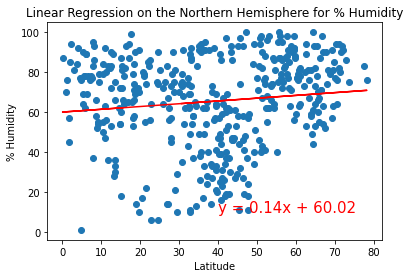

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel('% Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

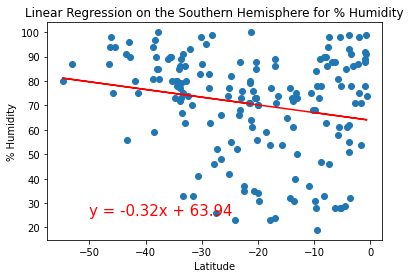

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel('% Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,25))

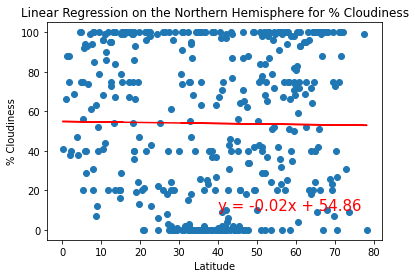

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel('% Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,10))

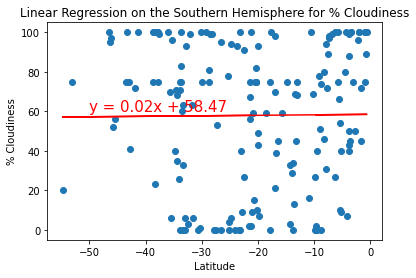

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel('% Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

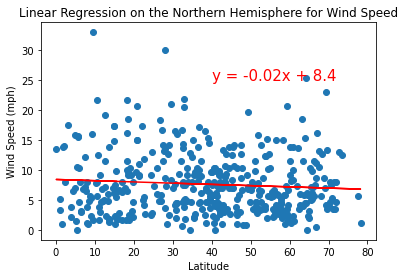

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed (mph)')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,25))

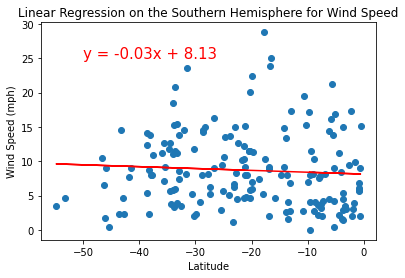

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed (mph)')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,25))